# Criando DataFrame

#Criando nomes

In [ ]:
import pandas as pd

In [ ]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f")

In [ ]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=m")
len(nomes_m)

20

In [ ]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
13,DANIEL,0,706527,14,M
19,RODRIGO,0,598825,20,M
9,MARCOS,0,1101126,10,M
17,FELIPE,0,615924,18,M
2,ANTONIO,0,2567494,3,M


In [ ]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
19,MARIANA,0,381778,20,F
0,MARIA,0,11694738,1,F
16,JULIA,0,430067,17,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F


In [ ]:
print(len(nomes_f)+ len(nomes_m))

40


In [ ]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [ ]:
print("Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [ ]:
frames = [nomes_f, nomes_m]
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198

In [ ]:
nomes = pd.concat(frames)['nome'].to_frame()# Selecionarmos apenas a coluna Nome e usamos o concat para juntar os dataframes

In [ ]:
nomes.sample(5)

,nome
90,ANDRESSA
61,CICERO
165,EUNICE
132,GABRIELE
66,PRISCILA


#Incluindo ID dos alunos

In [ ]:
import numpy as np
np.random.seed(123)

In [ ]:
total_alunos = len(nomes)
total_alunos

400

In [ ]:
nomes.sample(3)

,nome
34,SEBASTIAO
42,MARLENE
103,MAICON


In [ ]:
nomes["id_aluno"] =  np.random.permutation(total_alunos) + 1 # Criar IDs aleatorios para os alunos

In [ ]:
dominios = ['@dominiodoemmail.com.br', '@servicodoemail.com']

In [ ]:
dominios = ['@dominiodoemmail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [ ]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower() # Para concatenar str (str.cat) e para ficar minisculo (str.lower)

In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email
84,SEVERINO,142,@dominiodoemmail.com.br,severino@dominiodoemmail.com.br
0,JOSE,275,@servicodoemail.com,jose@servicodoemail.com
179,IAGO,296,@dominiodoemmail.com.br,iago@dominiodoemmail.com.br


#Criando Tabela de Cursos

In [ ]:
!pip3 install html5lib
!pip3 install lxml # Instalar bibliotecas para ler pag da web

In [ ]:
import html5lib

In [ ]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [ ]:
cursos = cursos[0]

In [ ]:
type(cursos)

pandas.core.frame.DataFrame

In [ ]:
cursos = cursos.rename(columns = {'Nome do curso': 'nome_do_curso'})

In [ ]:
cursos['id'] = cursos.index + 1
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [ ]:
cursos = cursos.set_index('id')
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


#Matriculando os Alunos nos Cursos

In [ ]:
nomes['matricula']=np.ceil(np.random.exponential(size=total_alunos).astype(int)) # para escolher de forma aleatoria

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matricula
194,CLARA,306,@servicodoemail.com,clara@servicodoemail.com,1.0
64,ROBSON,188,@dominiodoemmail.com.br,robson@dominiodoemmail.com.br,1.0
13,DANIEL,60,@servicodoemail.com,daniel@servicodoemail.com,2.0
98,GILSON,337,@dominiodoemmail.com.br,gilson@dominiodoemmail.com.br,0.0
33,NATALIA,129,@dominiodoemmail.com.br,natalia@dominiodoemmail.com.br,0.0


In [ ]:
nomes['matricula'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,matricula
120,JOSIANE,179,@servicodoemail.com,josiane@servicodoemail.com,1
121,ADEMIR,370,@servicodoemail.com,ademir@servicodoemail.com,1
119,MOISES,34,@servicodoemail.com,moises@servicodoemail.com,2
151,JOSUE,368,@dominiodoemmail.com.br,josue@dominiodoemmail.com.br,2
129,MIRIAN,98,@dominiodoemmail.com.br,mirian@dominiodoemmail.com.br,6


In [ ]:
nomes.matricula.describe()

count    400.000000
mean       2.035000
std        1.441864
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: matricula, dtype: float64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


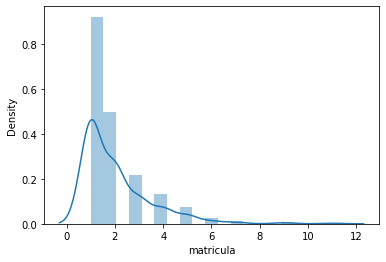

In [ ]:
sns.distplot(nomes.matricula)

In [ ]:
nomes.matricula.value_counts()

1     194
2     105
3      46
4      28
5      16
6       5
7       3
9       2
11      1
Name: matricula, dtype: int64

#Selecionando cursos

In [ ]:
nomes.sample(5)


,nome,id_aluno,dominio,email,matricula
164,MARISA,80,@servicodoemail.com,marisa@servicodoemail.com,2
100,JOEL,302,@dominiodoemmail.com.br,joel@dominiodoemmail.com.br,4
145,ITALO,31,@dominiodoemmail.com.br,italo@dominiodoemmail.com.br,1
136,KARINA,256,@dominiodoemmail.com.br,karina@dominiodoemmail.com.br,2
5,JULIANA,285,@servicodoemail.com,juliana@servicodoemail.com,1


In [ ]:
import numpy as np
todas_matriculas = []
x = np.random.rand(20) #Calcular randomicamente os 20 cursos
prob = x / sum(x)

In [ ]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matricula
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso']) # Da para saber quais curso cada aluno se inscreveu
matriculas.head(5)

,id_aluno,id_curso
0,189,15
1,58,2
2,204,8
3,383,15
4,231,15


In [ ]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso #  ID, nome do curso e a quantidade de alunos em cada curso'])

,id_aluno,nome_do_curso
id_curso,,
1,25,Lógica de programação
2,60,Java para Web
3,57,C# para Web
5,2,Cursos de Python
6,44,PHP com MySql
7,11,.NET para web
8,65,Novas integrações com Java
9,46,TDD com Java
10,62,Código limpo com C#


In [ ]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,25,Lógica de programação
2,60,Java para Web
3,57,C# para Web
5,2,Cursos de Python
6,44,PHP com MySql
7,11,.NET para web
8,65,Novas integrações com Java
9,46,TDD com Java
10,62,Código limpo com C#


In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matricula
155,EMANUEL,33,@servicodoemail.com,emanuel@servicodoemail.com,2
100,ROSELI,361,@dominiodoemmail.com.br,roseli@dominiodoemmail.com.br,4
70,JOAQUIM,182,@servicodoemail.com,joaquim@servicodoemail.com,3


In [ ]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [ ]:
matriculas.head()

,id_aluno,id_curso
0,189,15
1,58,2
2,204,8
3,383,15
4,231,15


In [ ]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [ ]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,25,Lógica de programação
2,60,Java para Web
3,57,C# para Web
5,2,Cursos de Python
6,44,PHP com MySql


#Saída em diferentes formatos

In [ ]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False) # Exportar para csv

In [ ]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_de_alunos":{"1":25,"2":60,"3":57,"5":2,"6":44,"7":11,"8":65,"9":46,"10":62,"11":66,"12":8,"13":2,"14":48,"15":76,"16":44,"17":76,"18":69,"19":31,"20":22},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [ ]:
matriculas_html = matriculas_por_curso.to_html()
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>25</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>60</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>57</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>5</th>
      <td>2</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>44</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>11</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>65</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>46</td>
      <td>TDD com Java</td>
    </tr>
    <tr>
      <th>10</th>
      <td>62</td>
 

# Lendo e escrevendo SQL

In [ ]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

engine = create_engine('sqlite:///:memory:') # SQL engine is a component of the system that is used to create, read, update and delete data from a database
engine # como o sqlalchemy se comunica com o banco de dados
type(engine)

matriculas_por_curso.to_sql('matriculas', engine)

inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


Buscando do banco SQL

In [ ]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [ ]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,5,2,Cursos de Python
1,7,11,.NET para web
2,12,8,Hardware básico
3,13,2,Persistência com .NET


In [ ]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,25
1,Java para Web,60
2,C# para Web,57
3,Cursos de Python,2
4,PHP com MySql,44
5,.NET para web,11
6,Novas integrações com Java,65
7,TDD com Java,46
8,Código limpo com C#,62
9,Preparatório para certificação Java,66


In [ ]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [ ]:
muitas_matriculas.query('quantidade_de_alunos > 60')

,nome_do_curso,quantidade_de_alunos
6,Novas integrações com Java,65
8,Código limpo com C#,62
9,Preparatório para certificação Java,66
13,Análise de dados,76
15,Internet das coisas,76
16,Programação funcional,69


In [ ]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')
muitas_matriculas

,nome_do_curso,quantidade_de_alunos


Escrevendo no Banco

In [ ]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine) # Escrever como um campo da nossa base de dados local

In [ ]:
print(inspector.get_table_names())

['matriculas']


Nomes dos alunos e alunas da próxima turma

In [ ]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,25,Lógica de programação
2,60,Java para Web
3,57,C# para Web
5,2,Cursos de Python
6,44,PHP com MySql


In [ ]:
matriculas.head()

,id_aluno,id_curso
0,189,15
1,58,2
2,204,8
3,383,15
4,231,15


In [ ]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))

In [ ]:
proxima_turma.head()

,id_aluno,id_curso
23,13,16
37,212,16
63,76,16
70,53,16
97,91,16


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno')) # Juntar com o nome dos alunos

,id_curso,nome,dominio,email,matricula
id_aluno,,,,,
12,16,THAIS,@servicodoemail.com,thais@servicodoemail.com,4
13,16,AMANDA,@servicodoemail.com,amanda@servicodoemail.com,3
43,16,VALMIR,@dominiodoemmail.com.br,valmir@dominiodoemmail.com.br,5
45,16,KELLY,@dominiodoemmail.com.br,kelly@dominiodoemmail.com.br,7
53,16,DEBORA,@dominiodoemmail.com.br,debora@dominiodoemmail.com.br,4
62,16,EDER,@servicodoemail.com,eder@servicodoemail.com,5
65,16,NAIARA,@dominiodoemmail.com.br,naiara@dominiodoemmail.com.br,2
71,16,BARBARA,@servicodoemail.com,barbara@servicodoemail.com,2
76,16,CRISTIANE,@dominiodoemmail.com.br,cristiane@dominiodoemmail.com.br,6


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
12         THAIS
13        AMANDA
43        VALMIR
45         KELLY
53        DEBORA
62          EDER
65        NAIARA
71       BARBARA
76     CRISTIANE
91       ANDREIA
97        SAMARA
99        RAIANE
99        RAIANE
104       SAMUEL
108       RAISSA
115        ERICK
124        OSMAR
137        MARCO
145       REGINA
152         LUIS
161      DOUGLAS
164      CLAUDIO
192       MURILO
199        FABIO
212      VITORIA
216       FATIMA
253       DENISE
254       SANDRO
261       ISABEL
272        PAULA
300        VILMA
307      RICARDO
308         ALEX
310       SIDNEI
314          EVA
319      CLEITON
334       JANETE
350       FLAVIO
360    FRANCISCO
368        JOSUE
369      TATIANE
378      ARLINDO
386     HENRIQUE
388      RODRIGO
Name: nome, dtype: object

In [ ]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [ ]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [ ]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [ ]:
proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})

,Alunos do curso de Estatística básica
id_aluno,
12,THAIS
13,AMANDA
43,VALMIR
45,KELLY
53,DEBORA
62,EDER
65,NAIARA
71,BARBARA
76,CRISTIANE


In [ ]:
proxima_turma = proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})

In [ ]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [ ]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,THAIS
1,AMANDA
2,VALMIR
3,KELLY
4,DEBORA
5,EDER
6,NAIARA
7,BARBARA
8,CRISTIANE
9,ANDREIA
